=== With Expert (Final Output) ===
Accuracy: 0.875
Macro F1: 0.8773
Macro Precision: 0.8857
Macro Recall: 0.875
Confusion Matrix:



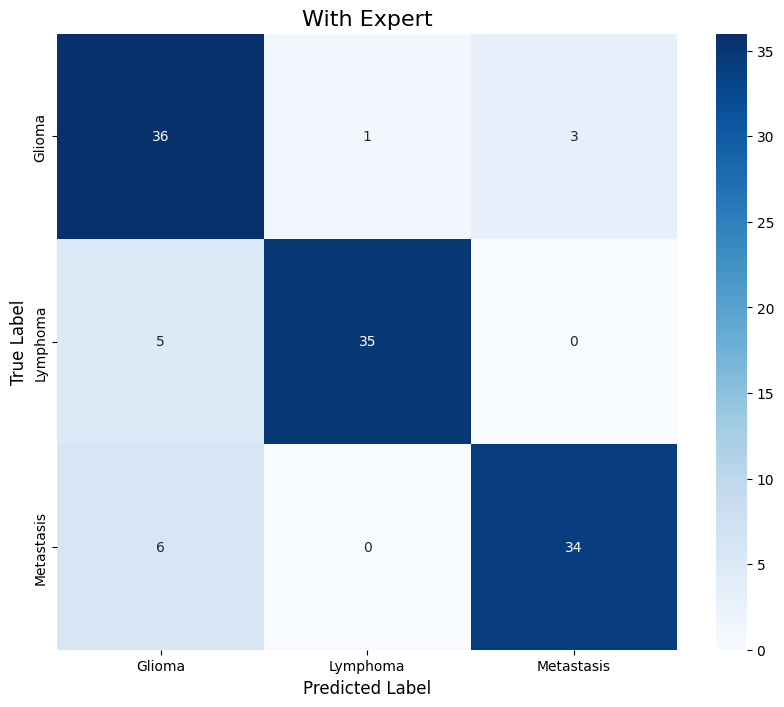


=== Without Expert ===
Accuracy: 0.3333
Macro F1: 0.2371
Macro Precision: 0.2704
Macro Recall: 0.3333
Confusion Matrix:



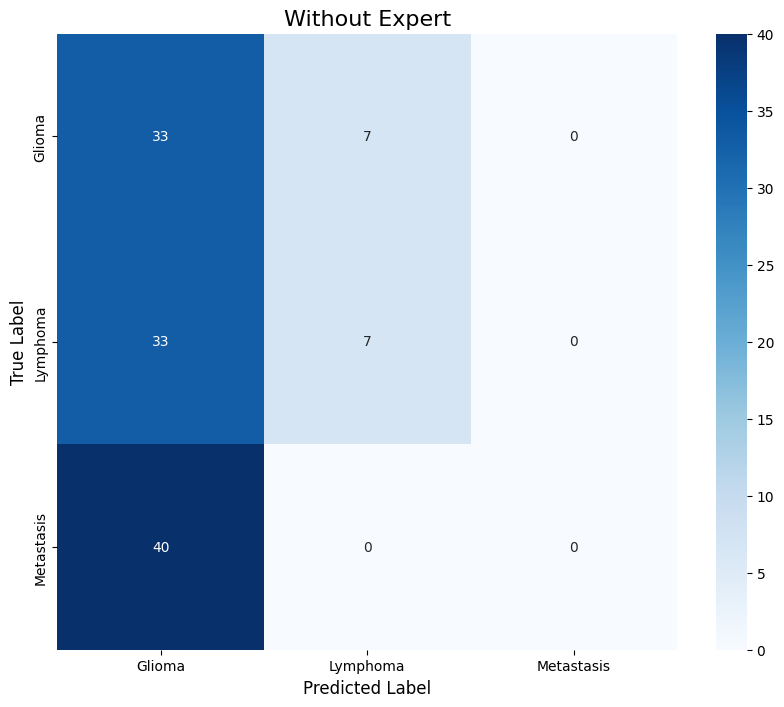


=== CM Difference (With - Without) ===


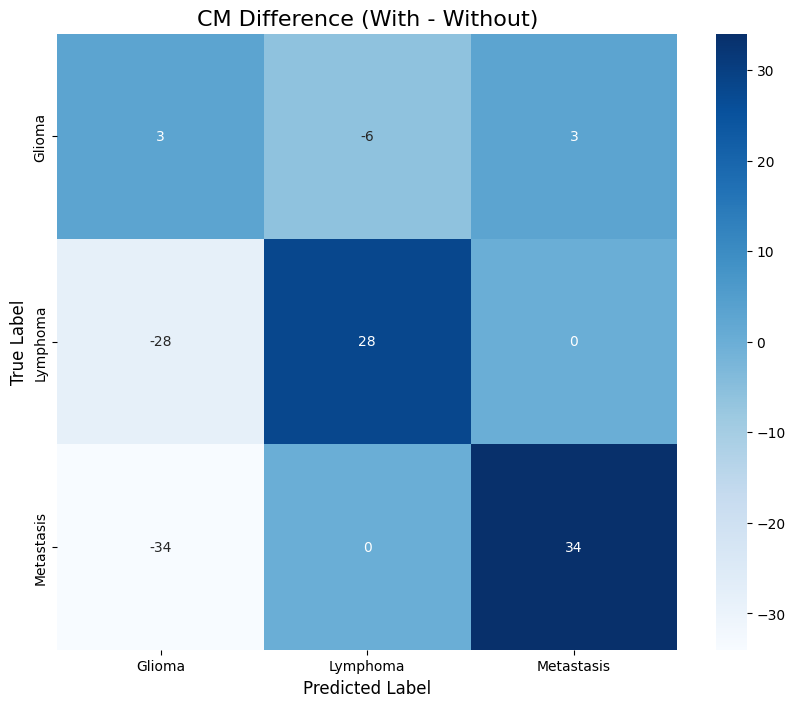

In [5]:
import json
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from difflib import get_close_matches
import seaborn as sns
import matplotlib.pyplot as plt

# === Load JSON files ===
with open("/home/hufsaim/VLM/VLM/m3/demo/0704/w_expert/after_ft_1.json") as f1:
    with_expert = json.load(f1)
with open("/home/hufsaim/VLM/VLM/m3/demo/0704/wo_expert/after_ft_1.json") as f2:
    without_expert = json.load(f2)

# === Define label space ===
standard_labels = ["Glioma", "Lymphoma", "Metastasis"]
all_labels = ["Glioma", "Lymphoma", "Metastasis"]

# === Normalize prediction to standard label or "Other" ===
def normalize_prediction(pred):
    matches = get_close_matches(pred, standard_labels, n=1, cutoff=0.4)
    return matches[0] if matches else "Other"

# === Extract GT, prediction (final output for with expert) ===
gt = []
pred_with = []
pred_without = []

for we, wo in zip(with_expert, without_expert):
    gt.append(we["GT"])
    pred_with.append(normalize_prediction(we.get("VILA-M3 Final", "")))
    pred_without.append(normalize_prediction(wo.get("VILA-M3", "")))

# === Metric Calculation Function ===
def evaluate(gt, pred, labels):
    cm = confusion_matrix(gt, pred, labels=labels)
    acc = accuracy_score(gt, pred)
    macro_f1 = f1_score(gt, pred, labels=labels, average="macro", zero_division=0)
    macro_prec = precision_score(gt, pred, labels=labels, average="macro", zero_division=0)
    macro_rec = recall_score(gt, pred, labels=labels, average="macro", zero_division=0)
    return cm, acc, macro_f1, macro_prec, macro_rec

# === Compute all metrics ===
cm_with, acc_with, f1_with, prec_with, rec_with = evaluate(gt, pred_with, all_labels)
cm_without, acc_without, f1_without, prec_without, rec_without = evaluate(gt, pred_without, all_labels)
cm_diff = cm_with - cm_without

# === Display results ===
print("=== With Expert (Final Output) ===")
print("Accuracy:", round(acc_with, 4))
print("Macro F1:", round(f1_with, 4))
print("Macro Precision:", round(prec_with, 4))
print("Macro Recall:", round(rec_with, 4))
print("Confusion Matrix:\n")
plt.figure(figsize=(10, 8))
sns.heatmap(cm_with, annot=True, fmt='d', cmap='Blues', 
            xticklabels=all_labels, yticklabels=all_labels)

plt.title('With Expert', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


print("\n=== Without Expert ===")
print("Accuracy:", round(acc_without, 4))
print("Macro F1:", round(f1_without, 4))
print("Macro Precision:", round(prec_without, 4))
print("Macro Recall:", round(rec_without, 4))
print("Confusion Matrix:\n")
plt.figure(figsize=(10, 8))
sns.heatmap(cm_without, annot=True, fmt='d', cmap='Blues', 
            xticklabels=all_labels, yticklabels=all_labels)

plt.title('Without Expert', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

print("\n=== CM Difference (With - Without) ===")
plt.figure(figsize=(10, 8))
sns.heatmap(cm_diff, annot=True, fmt='d', cmap='Blues', 
            xticklabels=all_labels, yticklabels=all_labels)

plt.title('CM Difference (With - Without)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()